# Week6-Naive Bayes

In [110]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import CategoricalNB

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [28]:
df = pd.read_csv("income_evaluation.csv")
df.rename(columns = {x:x.strip() for x in df.columns}, inplace = True)
for i in df.columns:
    df[i] = [None if str(x).strip() == '?' else x for x in df[i]]
df['workclass'].describe()

count        30725
unique           8
top        Private
freq         22696
Name: workclass, dtype: object

In [96]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x['workclass'] = x['workclass'].fillna(x['workclass'].describe().top)
x['occupation'] = x['occupation'].fillna(x['occupation'].describe().top)
x['native-country'] = x['native-country'].fillna(x['native-country'].describe().top)

enc = OrdinalEncoder()
x = enc.fit_transform(x.iloc[:, [1, 3, 5, 6, 7, 8, 9, 13]])

enc = LabelEncoder()
y = enc.fit_transform(y)

x, x_test, y, y_test = train_test_split(x, y)

print(len(x), len(x_test))
x

24420 8141


array([[ 3., 11.,  4., ...,  4.,  1., 38.],
       [ 5.,  7.,  2., ...,  4.,  1., 38.],
       [ 4.,  9.,  0., ...,  4.,  1., 38.],
       ...,
       [ 3., 12.,  2., ...,  4.,  1., 38.],
       [ 3., 15.,  2., ...,  4.,  1., 38.],
       [ 3., 11.,  2., ...,  4.,  1., 38.]])

Training accuracy: 0.7898443898443899
Testing accuracy: 0.7975678663554846


<Axes: >

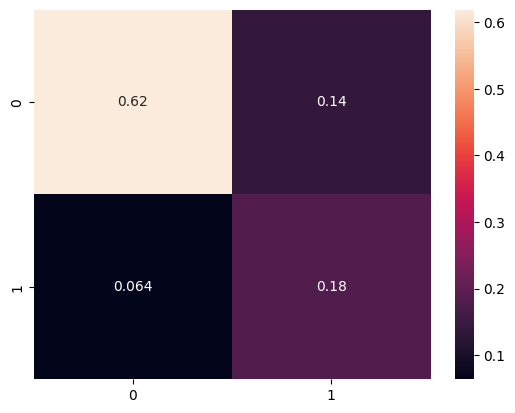

In [84]:
md = CategoricalNB().fit(x, y)
print("Training accuracy:", accuracy_score(y, md.predict(x)))
print("Testing accuracy:", accuracy_score(y_test, md.predict(x_test)))
sn.heatmap(confusion_matrix(y_test, md.predict(x_test), normalize = 'all'), annot = True)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      6212
           1       0.54      0.73      0.62      1929

    accuracy                           0.79      8141
   macro avg       0.72      0.77      0.74      8141
weighted avg       0.82      0.79      0.80      8141



(array([4321.,  339.,  292.,  212.,  353.,  439.,  457.,  367.,  503.,
         858.]),
 array([2.61808316e-06, 9.97282093e-02, 1.99453800e-01, 2.99179392e-01,
        3.98904983e-01, 4.98630574e-01, 5.98356165e-01, 6.98081756e-01,
        7.97807348e-01, 8.97532939e-01, 9.97258530e-01]),
 <BarContainer object of 10 artists>)

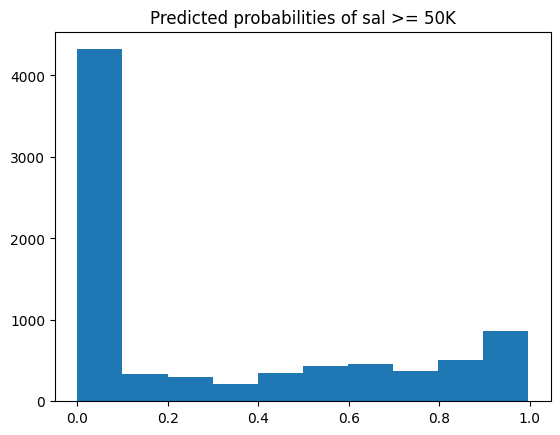

In [99]:
print(classification_report(y_test, md.predict(x_test)))

proba = pd.DataFrame(md.predict_proba(x_test))
pt.title("Predicted probabilities of sal >= 50K")
pt.hist(proba[1])

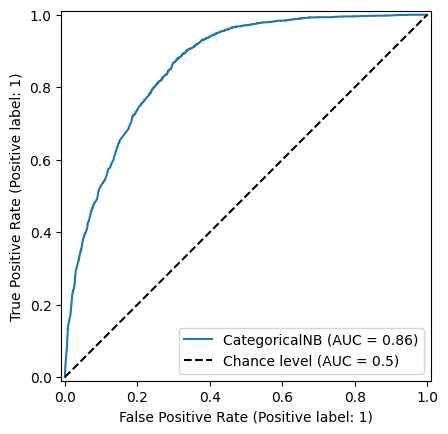

ROC-AUC score: 0.8610462133358169


In [112]:
RocCurveDisplay.from_estimator(md, x_test, y_test, plot_chance_level = True)
pt.show()

print("ROC-AUC score:", roc_auc_score(y_test, proba[1]))

In [109]:
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)
cv_scores = cross_val_score(md, x, y, cv = skf, scoring = 'accuracy')
print(cv_scores)
print("Average =", sum(cv_scores)/10)

[0.79238329 0.7960688  0.8046683  0.77764128 0.78869779 0.79238329
 0.7960688  0.78828829 0.78624079 0.7972973 ]
Average = 0.791973791973792
